## Demonstration of the GaiaCatalog and BrightStarCatalog classes
Shows how to
- query the database
- plot distribution of selected stars

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import astropy.units as u
from astropy.coordinates import SkyCoord

from ctapointing.catalog import GaiaCatalog, BrightStarCatalog
from ctapointing.catalog.utils import query_catalog

### Make an instance of the GaiaCatalog class
The catalog is created for stars within given minimum and maximum magnitudes. It is fetched from the Gaia database
and cached to file. Only when flag 'create_from_database=True', the catalog is recreated when fetched a second time. Otherwise, the data is taken from the file cache.

In [2]:
min_mag = 3.0
max_mag = 9

gc = GaiaCatalog(min_mag=min_mag, max_mag=max_mag, create_from_database=True)

In [3]:
# Test case: Westerlund 1 position
search_radius = 5*u.deg
c_test = SkyCoord(ra='16h47m04.0s', dec='-45d51m04.9s', frame='icrs')
print(c_test)

<SkyCoord (ICRS): (ra, dec) in deg
    (251.76666667, -45.85136111)>


In [4]:
l = gc.select_around_position(c_test, search_radius)
print(l.info)

<Table length=871>
      name        dtype      unit                                     description                                 n_bad
---------------- ------- ------------ --------------------------------------------------------------------------- -----
       SOURCE_ID   int64                       Unique source identifier (unique within a particular Data Release)     0
              ra float64          deg                                                             Right ascension     0
             dec float64          deg                                                                 Declination     0
       ref_epoch float64           yr                                                             Reference epoch     0
            pmra float64     mas / yr                                  Proper motion in right ascension direction    10
           pmdec float64     mas / yr                                      Proper motion in declination direction    10
phot_g_mean_flux floa

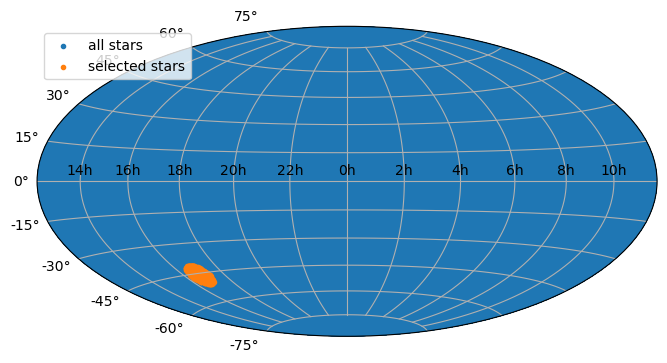

In [5]:
gc.plot_catalog()
plt.show()

### Bright Star Catalog

In [11]:
bc = BrightStarCatalog(create_from_database=True)

In [12]:
l = bc.select_around_position(c_test, search_radius)
print(l.info)

<Table length=0>
      name       dtype    unit  
--------------- ------- --------
      source_id   int64         
             ra float64      deg
            dec float64      deg
      ref_epoch float64       yr
           pmra float64 mas / yr
          pmdec float64 mas / yr
phot_v_mean_mag float64      mag
           teff   int64        K



### Catalog completeness

In [13]:
gc = GaiaCatalog(min_mag=-12, max_mag=10)
bc = BrightStarCatalog(min_mag=-12, max_mag=10)

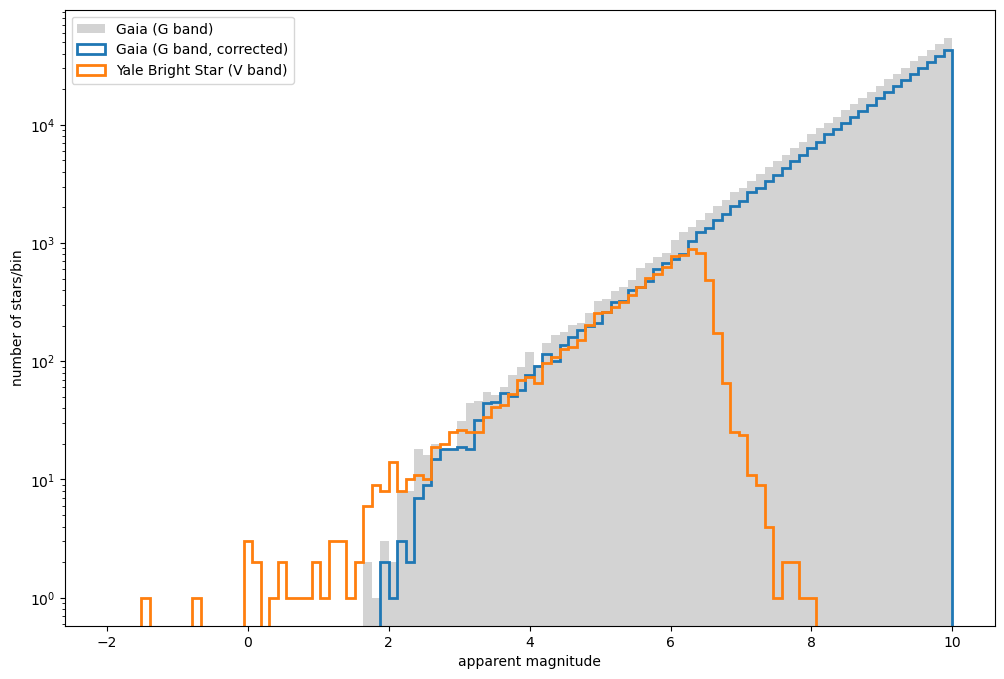

In [14]:
fig, ax = plt.subplots(figsize=(12,8))

# obviously need to correct Gaia G magnitude to be consistent with V magnitude
correction = +0.25 

bins = np.linspace(-2, 10, 100)
ax.hist(gc.table['phot_g_mean_mag'], bins=bins, color='lightgray', label='Gaia (G band)')
ax.hist(gc.table['phot_v_mean_mag'], histtype='step', linewidth=2.0, bins=bins, label='Gaia (G band, corrected)')
ax.hist(bc.table['phot_v_mean_mag'], bins=bins, histtype='step', linewidth=2.0, label='Yale Bright Star (V band)')
ax.set_yscale('log')

ax.set_xlabel('apparent magnitude')
ax.set_ylabel('number of stars/bin')
ax.legend()

plt.show()

### Directly select from both catalogs.

In [16]:
stars, v_mag, source_id = query_catalog(c_test, search_radius, max_mag=7)
print(stars)

<SkyCoord (ICRS): (ra, dec) in deg
    [(253.42666793, -43.05111433), (246.79592737, -47.55488377),
     (253.49886248, -42.36204479), (257.67612136, -44.55798409),
     (248.52091936, -44.04532455), (247.42634386, -46.24324913),
     (252.89050343, -41.23053655), (247.92401678, -41.81715759),
     (249.09399141, -42.85887639), (253.50765128, -41.80640037),
     (245.6210645 , -43.91211069), (250.41759783, -49.65156362),
     (250.33508191, -48.76299983), (253.61225308, -42.47892649),
     (253.74376848, -41.15086638), (255.13483296, -45.45176392),
     (249.60948327, -43.39851556), (253.63148087, -49.71082538),
     (250.76485658, -46.07031045), (255.11220543, -48.64811591),
     (248.78204685, -45.24461404), (253.54192154, -41.82504902),
     (249.49891373, -46.15459653), (255.92367404, -47.16054699),
     (256.45210993, -44.10496928), (253.49521754, -41.99433753),
     (250.97526441, -41.11344142), (253.7638697 , -42.09084066),
     (251.70964671, -41.48106103), (250.10895528, -44.5